# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)





## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

In [3]:
print(cities)

['pevek', 'mount gambier', 'mushie', 'brooks', 'sinkat', 'hermanus', 'guerrero negro', 'bethel', 'jamestown', 'pasichna', 'nikolskoye', 'arraial do cabo', 'jutai', 'illoqqortoormiut', 'puerto carreno', 'libourne', 'domoni', 'longyearbyen', 'bredasdorp', 'busselton', 'hobart', 'hilo', 'new norfolk', 'port blair', 'narsaq', 'mombetsu', 'port augusta', 'mataura', 'nioki', 'mar del plata', 'cape town', 'bluff', 'ponta do sol', 'albany', 'cidreira', 'galesong', 'port alfred', 'airai', 'pedasi', 'vaini', 'katsuura', 'ushuaia', 'chimbote', 'esperance', 'punta arenas', 'tazovskiy', 'north bend', 'barrow', 'provideniya', 'yabassi', 'grand river south east', 'sambava', 'ribeira grande', 'ambodifototra', 'khatanga', 'samusu', 'saint-philippe', 'beypur', 'pangai', 'thompson', 'ahuimanu', 'muzaffarabad', 'georgetown', 'kapaa', 'qaanaaq', 'bucerias', 'bria', 'labuhan', 'suclayin', 'tevaitoa', 'buchanan', 'kavieng', 'toamasina', 'honningsvag', 'coahuayana', 'avarua', 'calama', 'port elizabeth', 'nary

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#city = "london"
city_id = []
city_name = []
temprature = []
cloud = []
wind = []
lat = []
lon = []
humidity = []


#tem = 0
#cld = 0
#wnd = 0
#lt = 0
#n = 0
#hum = 0
#tm = 0


for city in cities:
    response = requests.get(query_url + city).json()
    try:
#       city_id = response['id']
#       city_name = response['name']
        
        city_id.append(response['id'])
        city_name.append(response['name'])
        temprature.append(response['main']['temp'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        humidity.append(response['main']['humidity'])
        
        print(f'City ID {city_id} City Name is {city_name} temp {temprature} Cloud {cloud} Wind {wnd} Latituede {lat} Longitude {lon} Humidity {humidity}')

    
    except:
        
        pass 
      

In [25]:
### Convert Raw Data to DataFrame
# create dataframe

weather_df = pd.DataFrame({
    "City Id": city_id,
    "City Name": city_name,
    "Temprature": temprature,
    "Cloudiness": cloud,
    "Wind": wind,
    "Latitude": lat,
    "Longitude": lon,
    "Humidity": humidity
})

weather_df
# Display the DataFrame

,City Id,City Name,Temprature,Cloudiness,Wind,Latitude,Longitude,Humidity
0,2122090,Pevek,42.08,0,1.57,69.70,170.31,76
1,2156643,Mount Gambier,51.80,90,9.17,-37.83,140.77,93
2,2312249,Mushie,76.19,99,6.31,-3.02,16.90,79
3,5909514,Brooks,77.00,9,11.41,50.58,-111.89,42
4,3366880,Hermanus,48.00,97,1.99,-34.42,19.23,84
...,...,...,...,...,...,...,...,...
539,1686858,Siayan,85.53,17,3.76,8.27,123.10,66
540,2172880,Byron Bay,68.34,0,16.11,-28.65,153.62,49
541,3414079,Olafsvik,52.16,100,15.84,64.89,-23.71,92
542,1258269,Rāzole,75.79,100,10.11,16.48,81.83,91


In [39]:
#* Export the city data into a .csv.
weather_df.to_csv('CityWeather.csv',index =False)
print(weather_df)

     City Id      City Name  Temprature  Cloudiness   Wind  Latitude  \
0    2122090          Pevek       42.08           0   1.57     69.70   
1    2156643  Mount Gambier       51.80          90   9.17    -37.83   
2    2312249         Mushie       76.19          99   6.31     -3.02   
3    5909514         Brooks       77.00           9  11.41     50.58   
4    3366880       Hermanus       48.00          97   1.99    -34.42   
..       ...            ...         ...         ...    ...       ...   
539  1686858         Siayan       85.53          17   3.76      8.27   
540  2172880      Byron Bay       68.34           0  16.11    -28.65   
541  3414079       Olafsvik       52.16         100  15.84     64.89   
542  1258269         Rāzole       75.79         100  10.11     16.48   
543  3430708       Mercedes       39.78           0   6.49    -34.65   

     Longitude  Humidity  
0       170.31        76  
1       140.77        93  
2        16.90        79  
3      -111.89        42  


In [47]:
weather_path = "CityWeather.csv"

weather_final_df = pd.read_csv(weather_path)
#all_dup = merged_df.loc[merged_df["Mouse ID"] == "g989"]
humidcheck_df = weather_final_df.loc[weather_final_df['Humidity'] > 100]
humidcheck_df

,City Id,City Name,Temprature,Cloudiness,Wind,Latitude,Longitude,Humidity


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
# No cities found which has humidity higher than 100

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

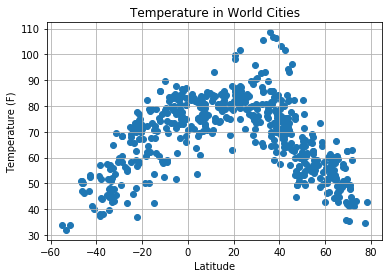

In [61]:
plt.scatter(weather_final_df["Latitude"], weather_final_df["Temprature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("LatVsTemp.png")
# Show plot
plt.show()

## Latitude vs. Humidity Plot

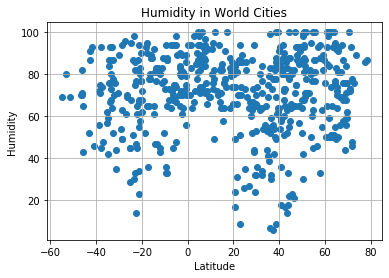

In [60]:
plt.scatter(weather_final_df["Latitude"], weather_final_df["Humidity"], marker="o")
plt.title("Humidity in World Cities")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("LatVsHumidity.png")
# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

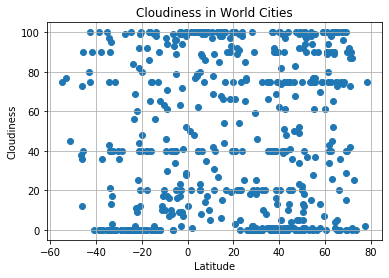

In [111]:
plt.scatter(weather_final_df["Latitude"], weather_final_df["Cloudiness"], marker="o")
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("LatVsCloudiness.png")
# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

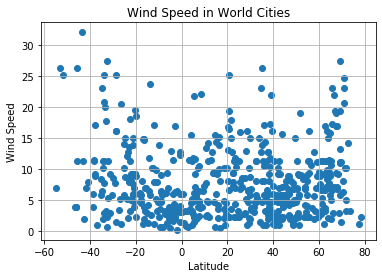

In [63]:
plt.scatter(weather_final_df["Latitude"], weather_final_df["Wind"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("LatVsWind.png")
# Show plot
plt.show()

## Linear Regression

In [58]:
# OPTIONAL: Create a function to create Linear Regression plots
x_values = weather_final_df["Latitude"]
y_values = weather_final_df["Temprature"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)


0      66.724403
1      69.352313
2      68.501597
3      67.191674
4      69.268977
         ...    
539    68.225682
540    69.127965
541    66.841954
542    68.025039
543    69.274598
Name: Latitude, Length: 544, dtype: float64


In [67]:
# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.02x +68.43


The r-squared is: 0.5023527898990426


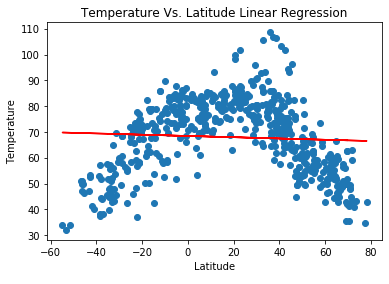

In [100]:
# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation

plt.title("Temperature Vs. Latitude Linear Regression")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# Save the figure
plt.savefig("LatTempRegress.png")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

In [80]:
# Create Northern and Southern Hemisphere DataFrames
#weather_final_df

northern_df = weather_final_df.loc[weather_final_df['Latitude'] >= 0]

southern_df = weather_final_df.loc[weather_final_df['Latitude'] < 0]

northern_df

,City Id,City Name,Temprature,Cloudiness,Wind,Latitude,Longitude,Humidity
0,2122090,Pevek,42.08,0,1.57,69.70,170.31,76
3,5909514,Brooks,77.00,9,11.41,50.58,-111.89,42
5,4021858,Guerrero Negro,79.86,0,12.95,27.98,-114.06,52
6,5282297,Bethel,67.80,99,1.99,41.37,-73.41,80
7,5122534,Jamestown,68.36,1,5.10,42.10,-79.24,73
...,...,...,...,...,...,...,...,...
537,136014,Gachsaran,78.80,20,3.40,30.36,50.80,36
538,2541479,Nador,75.20,66,13.87,35.17,-2.93,69
539,1686858,Siayan,85.53,17,3.76,8.27,123.10,66
541,3414079,Olafsvik,52.16,100,15.84,64.89,-23.71,92


In [81]:
southern_df


,City Id,City Name,Temprature,Cloudiness,Wind,Latitude,Longitude,Humidity
1,2156643,Mount Gambier,51.80,90,9.17,-37.83,140.77,93
2,2312249,Mushie,76.19,99,6.31,-3.02,16.90,79
4,3366880,Hermanus,48.00,97,1.99,-34.42,19.23,84
10,3471451,Arraial do Cabo,72.41,69,7.96,-22.97,-42.03,82
11,3663693,Jutaí,77.74,96,0.58,-5.18,-68.90,74
...,...,...,...,...,...,...,...,...
521,1065158,Farafangana,62.58,2,8.70,-22.82,47.83,86
523,921786,Mitsamiouli,76.82,10,5.28,-11.38,43.28,76
525,2109528,Buala,83.66,16,0.63,-8.14,159.59,68
540,2172880,Byron Bay,68.34,0,16.11,-28.65,153.62,49


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5023527898990426


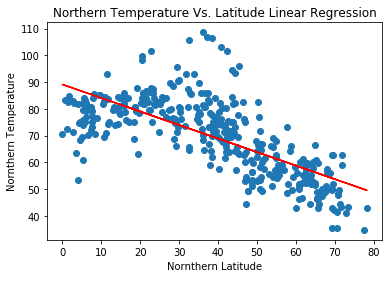

In [101]:
# Perform a linear regression on Northern temperature vs. latitude
x_Nvalues = northern_df["Latitude"]
y_Nvalues = northern_df["Temprature"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Nvalues, y_Nvalues)

# Get regression values
Nregress_values = x_Nvalues * slope + intercept

Nline_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_Nvalues,y_Nvalues)
plt.plot(x_Nvalues,Nregress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Temperature Vs. Latitude Linear Regression")
plt.xlabel('Nornthern Latitude')
plt.ylabel('Nornthern Temperature')
plt.annotate(Nline_eq,(20,15),fontsize=15,color="red")

# Save the figure
plt.savefig("NorthLatTempRegress.png")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6078328563511076


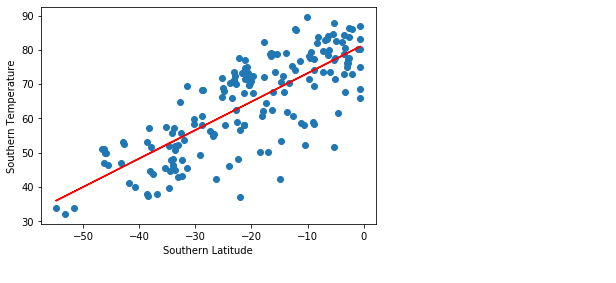

In [85]:
# Perform a linear regression on Southern temperature vs. latitude
x_Svalues = southern_df["Latitude"]
y_Svalues = southern_df["Temprature"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Svalues, y_Svalues)

# Get regression values
Sregress_values = x_Svalues * slope + intercept

Sline_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_Svalues,y_Svalues)
plt.plot(x_Svalues,Sregress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Temperature Vs. Latitude Linear Regression")
plt.xlabel('Southern Latitude')
plt.ylabel('Southern Temperature')
plt.annotate(Sline_eq,(20,15),fontsize=15,color="red")

# Save the figure
plt.savefig("SouthernLatTempRegress.png")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0022624315367028415


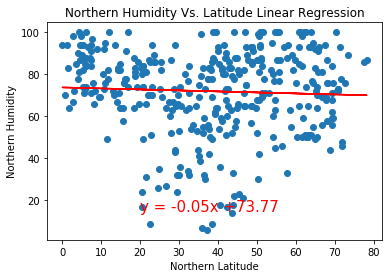

In [104]:
# Perform a linear regression on Northern Humidity vs. latitude
x_Nvalues = northern_df["Latitude"]
y_Nvalues = northern_df["Humidity"]
# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Nvalues, y_Nvalues)

# Get regression values
Nregress_values = x_Nvalues * slope + intercept

Nline_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_Nvalues,y_Nvalues)
plt.plot(x_Nvalues,Nregress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Humidity Vs. Latitude Linear Regression")
plt.xlabel('Northern Latitude')
plt.ylabel('Northern Humidity')
plt.annotate(Nline_eq,(20,15),fontsize=15,color="red")

# Save the figure
plt.savefig("NorthernLatHumidityRegress.png")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.012847176065015876


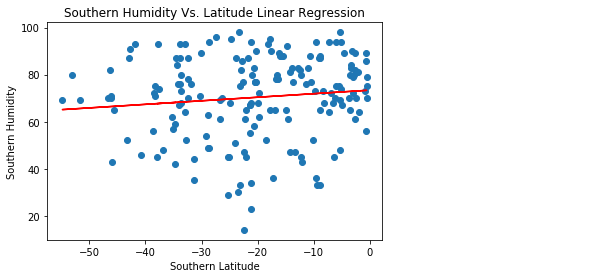

In [103]:
# Perform a linear regression on Southern Humidity vs. latitude
x_Svalues = southern_df["Latitude"]
y_Svalues = southern_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Svalues, y_Svalues)

# Get regression values
Sregress_values = x_Svalues * slope + intercept

Sline_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_Svalues,y_Svalues)
plt.plot(x_Svalues,Sregress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Humidity Vs. Latitude Linear Regression")
plt.xlabel('Southern Latitude')
plt.ylabel('Southern Humidity')
plt.annotate(Sline_eq,(20,15),fontsize=15,color="red")

# Save the figure
plt.savefig("SouthLatHumidityRegress.png")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002100250572838819


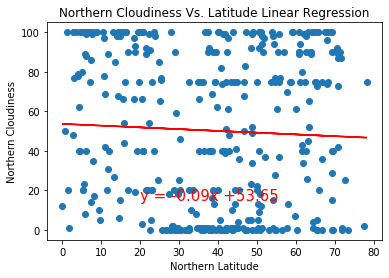

In [105]:
# Perform a linear regression on Northern Cloudiness vs. latitude
x_Nvalues = northern_df["Latitude"]
y_Nvalues = northern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Nvalues, y_Nvalues)

# Get regression values
Nregress_values = x_Nvalues * slope + intercept

Nline_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_Nvalues,y_Nvalues)
plt.plot(x_Nvalues,Nregress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Cloudiness Vs. Latitude Linear Regression")
plt.xlabel('Northern Latitude')
plt.ylabel('Northern Cloudiness')
plt.annotate(Nline_eq,(20,15),fontsize=15,color="red")

# Save the figure
plt.savefig("NorthernLatCloudRegress.png")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.012113034766691694


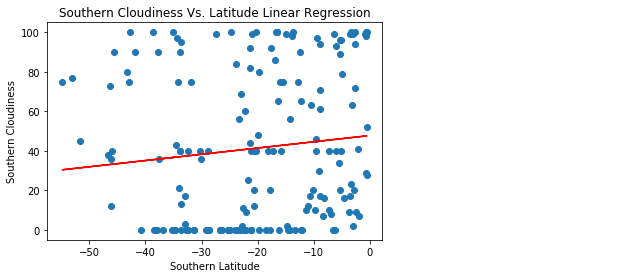

In [106]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_Svalues = southern_df["Latitude"]
y_Svalues = southern_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Svalues, y_Svalues)

# Get regression values
Sregress_values = x_Svalues * slope + intercept

Sline_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_Svalues,y_Svalues)
plt.plot(x_Svalues,Sregress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Cloudiness Vs. Latitude Linear Regression")
plt.xlabel('Southern Latitude')
plt.ylabel('Southern Cloudiness')
plt.annotate(Sline_eq,(20,15),fontsize=15,color="red")

# Save the figure
plt.savefig("SouthLatCloudRegress.png")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012621669579424065


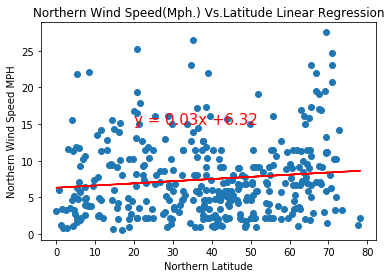

In [107]:
# Perform a linear regression on Wind (mph) vs. latitude
x_Nvalues = northern_df["Latitude"]
y_Nvalues = northern_df["Wind"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Nvalues, y_Nvalues)

# Get regression values
Nregress_values = x_Nvalues * slope + intercept

Nline_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_Nvalues,y_Nvalues)
plt.plot(x_Nvalues,Nregress_values,"r-")

# Label plot and annotate the line equation
plt.title("Northern Wind Speed(Mph.) Vs.Latitude Linear Regression")
plt.xlabel('Northern Latitude')
plt.ylabel('Northern Wind Speed MPH')
plt.annotate(Nline_eq,(20,15),fontsize=15,color="red")

# Save the figure
plt.savefig("NorthernLatWindRegress.png")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.12978326193363102


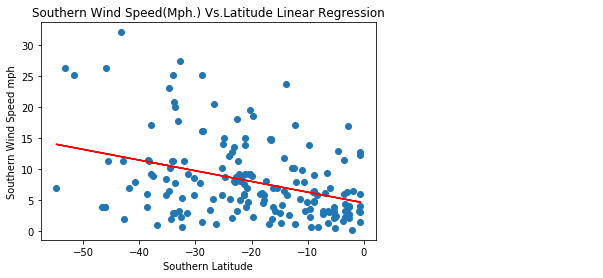

In [108]:
#Southern Hemisphere - Wind Speed (MPH) vs. Latitude Linear Regression
x_Svalues = southern_df["Latitude"]
y_Svalues = southern_df["Wind"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_Svalues, y_Svalues)

# Get regression values
Sregress_values = x_Svalues * slope + intercept

Sline_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_Svalues,y_Svalues)
plt.plot(x_Svalues,Sregress_values,"r-")

# Label plot and annotate the line equation
plt.title("Southern Wind Speed(Mph.) Vs.Latitude Linear Regression")
plt.xlabel('Southern Latitude')
plt.ylabel('Southern Wind Speed mph')
plt.annotate(Sline_eq,(20,15),fontsize=15,color="red")

# Save the figure
plt.savefig("SouthLatWindRegress.png")
# Print r square value
print(f"The r-squared is: {rvalue**2}")

# Show plot
plt.show()

In [110]:
print('Above all plots project some cities are on extreme weather, either lowest or highest based\
upon Weather Data of Wind,Cloudiness,Humidity.')



Above all plots project some cities are on extreme weather, either lowest or highest basedupon Weather Data of Wind,Cloudiness,Humidity.
